## Partie a : modele from scratch (Implémentation de la régression linéaire à partir de zéro)
-----------------------------------------------------------------------------

## Introduction
Ce notebook explore trois approches différentes pour implémenter la régression linéaire :
1. **From Scratch** : Implémentation manuelle de l'algorithme avec descente de gradient
2. **Scikit-Learn** : Utilisation de la bibliothèque standard de machine learning
3. **TensorFlow** : Framework de deep learning pour construire le modèle

**Objectif** : Prédire le prix des maisons en fonction de leur superficie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Style pour les graphiques
plt.style.use('seaborn-v0_8')

### Import des bibliothèques
Les bibliothèques NumPy et Pandas permettent la manipulation des données, Matplotlib pour la visualisation, et scikit-learn pour les fonctionnalités ML standards.

# Data Generation

In [ ]:
# Paramètres pour la génération des données
np.random.seed(42)  # Pour la reproductibilité
n_samples = 200

# Génération de superficies entre 50 et 200 m²
superficie = np.random.uniform(50, 200, n_samples)

# Relation linéaire avec du bruit : prix = 2000 * superficie + 50000 + bruit
prix = 2000 * superficie + 50000 + np.random.normal(0, 30000, n_samples)

# Création du DataFrame
df = pd.DataFrame({
    'superficie': superficie,
    'prix': prix
})

# Affichage des premières lignes
print("Aperçu des données :")
print(df.head())
print(f"\nTaille du dataset : {df.shape}")

Aperçu des données :
   superficie           prix
0  106.181018  241961.294007
1  192.607146  442181.902838
2  159.799091  378390.356742
3  139.798773  308167.002718
4   73.402796  252778.827467

Taille du dataset : (200, 2)


## Génération des données synthétiques
On crée un jeu de données artificiel avec 200 échantillons suivant une relation linéaire : **Prix = 2000 × Superficie + 50000 + bruit**. Le bruit gaussien simule les variations naturelles du marché immobilier.

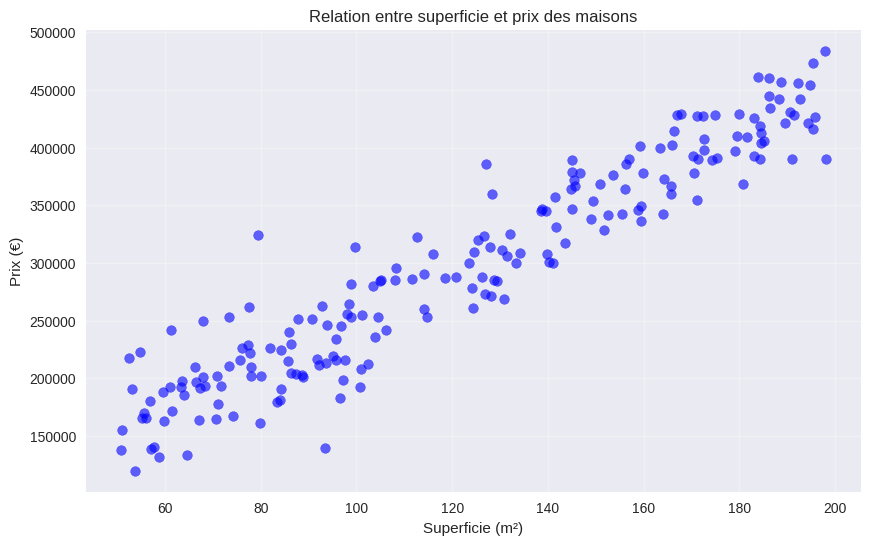

Coefficient de corrélation : 0.949


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['superficie'], df['prix'], alpha=0.6, color='blue')
plt.title('Relation entre superficie et prix des maisons')
plt.xlabel('Superficie (m²)')
plt.ylabel('Prix (€)')
plt.grid(True, alpha=0.3)
plt.show()

# Calcul de la corrélation
correlation = df['superficie'].corr(df['prix'])
print(f"Coefficient de corrélation : {correlation:.3f}")

## Visualisation exploratoire
Le graphique montre une corrélation positive forte entre superficie et prix, confirmée par le coefficient de corrélation proche de 1.

In [ ]:
def normaliser(X):
    """Normalise les features"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalise = (X - mean) / std
    return X_normalise, mean, std

# Préparation des données
X = df['superficie'].values
y = df['prix'].values

# Normalisation
X_normalise, X_mean, X_std = normaliser(X)

# Ajout d'une colonne de 1 pour le terme biais (intercept)
X_with_bias = np.c_[np.ones(X_normalise.shape[0]), X_normalise]

print("Shape de X_with_bias:", X_with_bias.shape)
print("Shape de y:", y.shape)

Shape de X_with_bias: (200, 2)
Shape de y: (200,)


## Préparation et normalisation des données
La normalisation (standardisation) des features améliore la convergence de la descente de gradient en centrant les données autour de 0 avec un écart-type de 1. On ajoute une colonne de 1 pour le terme de biais (intercept).

#Modele


In [ ]:
def modele(X, theta):
    """
    Calcule la prédiction du modèle linéaire
    X: matrice des features (m x n)
    theta: paramètres du modèle (n x 1)
    Retourne: prédictions (m x 1)
    """
    return np.dot(X, theta)

## Fonction de prédiction
Cette fonction calcule les prédictions selon la formule : **ŷ = X × θ**, où θ contient les paramètres du modèle (biais et poids).

### Fonction coût (MSE - Mean Squared Error)
----------------------------------------

In [ ]:
def fonction_cout(X, y, theta):
    """
    Calcule le coût (MSE) du modèle
    X: matrice des features
    y: vecteur target
    theta: paramètres du modèle
    Retourne: valeur du coût
    """
    m = len(y)
    predictions = modele(X, theta)
    cout = (1/(2*m)) * np.sum((predictions - y)**2)
    return cout

### Fonction de coût (MSE)
Le MSE mesure l'écart quadratique moyen entre prédictions et valeurs réelles. C'est la fonction à minimiser pour optimiser les paramètres θ.

#Descente de gradient

In [ ]:
def descente_gradient(X, y, theta, alpha, iterations):
    """
    Effectue la descente de gradient
    X: matrice des features
    y: vecteur target
    theta: paramètres initiaux
    alpha: taux d'apprentissage
    iterations: nombre d'itérations
    Retourne: theta final, historique des coûts
    """
    m = len(y)
    cout_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = modele(X, theta)
        erreur = predictions - y

        # Calcul du gradient
        gradient = (1/m) * np.dot(X.T, erreur)

        # Mise à jour des paramètres
        theta = theta - alpha * gradient

        # Sauvegarde du coût
        cout_history[i] = fonction_cout(X, y, theta)

        # Affichage progressif
        if i % 100 == 0:
            print(f"Itération {i}: Coût = {cout_history[i]:.2f}")

    return theta, cout_history

### Algorithme de descente de gradient
Cœur de l'optimisation : à chaque itération, on calcule le gradient (dérivée de la fonction de coût) et on ajuste les paramètres θ dans la direction opposée pour minimiser l'erreur. Le taux d'apprentissage α contrôle la taille des pas.

#Entraînement du modèle

In [ ]:
# Initialisation des paramètres
theta_initial = np.zeros(2)  # [bias, poids]

# Hyperparamètres
alpha = 0.01  # taux d'apprentissage
iterations = 1000

print("Début de l'entraînement...")
theta_final, cout_history = descente_gradient(
    X_with_bias, y, theta_initial, alpha, iterations
)

print(f"\nParamètres finaux du modèle:")
print(f"Theta0 (bias): {theta_final[0]:.2f}")
print(f"Theta1 (pente): {theta_final[1]:.2f}")

Début de l'entraînement...
Itération 0: Coût = 47469196129.64
Itération 100: Coût = 6723828074.73
Itération 200: Coût = 1264776910.77
Itération 300: Coût = 533375010.79
Itération 400: Coût = 435382022.04
Itération 500: Coût = 422252953.27
Itération 600: Coût = 420493924.90
Itération 700: Coût = 420258250.85
Itération 800: Coût = 420226675.32
Itération 900: Coût = 420222444.84

Paramètres finaux du modèle:
Theta0 (bias): 297211.47
Theta1 (pente): 87553.26


### Résultats de l'entraînement
Après 1000 itérations, on obtient les paramètres optimaux (θ0 et θ1) qui définissent la droite de régression. La décroissance du coût montre que l'algorithme converge correctement.

#Visualisation de l'apprentissage

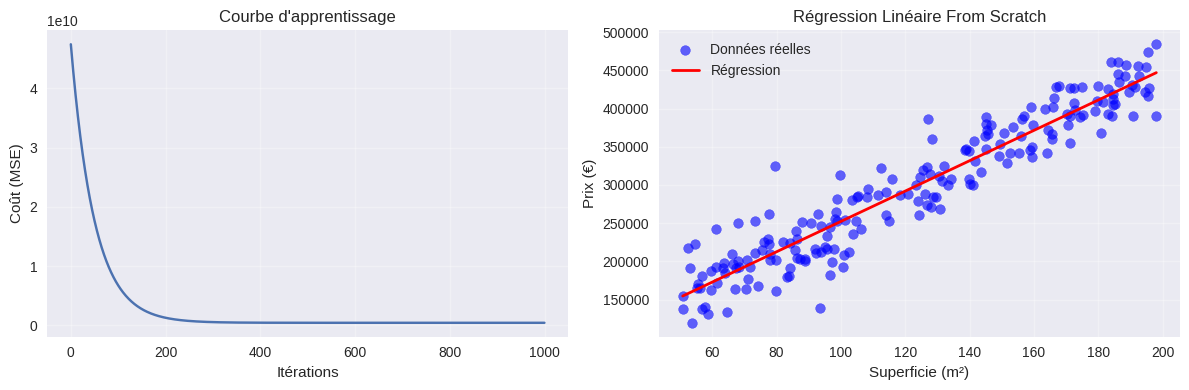

In [ ]:
# Courbe d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cout_history)
plt.title('Courbe d\'apprentissage')
plt.xlabel('Itérations')
plt.ylabel('Coût (MSE)')
plt.grid(True, alpha=0.3)

# Données et droite de régression
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.6, color='blue', label='Données réelles')

# Prédictions avec le modèle entraîné
predictions = modele(X_with_bias, theta_final)

# Pour visualiser la droite, on crée des points réguliers
X_range = np.linspace(X.min(), X.max(), 100)
X_range_normalise = (X_range - X_mean) / X_std
X_range_with_bias = np.c_[np.ones(X_range_normalise.shape[0]), X_range_normalise]
y_range_pred = modele(X_range_with_bias, theta_final)

plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Régression')
plt.title('Régression Linéaire From Scratch')
plt.xlabel('Superficie (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interprétation des graphiques
- **Gauche** : La courbe d'apprentissage montre la diminution rapide puis stabilisation du coût
- **Droite** : La droite de régression s'ajuste bien aux données, capturant la tendance linéaire

#Fonction de prédiction

In [ ]:
def predire_prix(superficie, theta, X_mean, X_std):
    """
    Prédit le prix pour une superficie donnée
    """
    # Normalisation de l'input
    superficie_normalise = (superficie - X_mean) / X_std

    # Ajout du biais
    X_pred = np.array([1, superficie_normalise])

    # Prédiction
    prix_pred = modele(X_pred, theta)

    return prix_pred

# Test de prédiction
superficies_test = [80, 120, 150, 180]
print("\nPrédictions :")
for superficie in superficies_test:
    prix_pred = predire_prix(superficie, theta_final, X_mean, X_std)
    print(f"Superficie {superficie} m² → Prix prédit: {prix_pred:,.0f} €")


Prédictions :
Superficie 80 m² → Prix prédit: 212,678 €
Superficie 120 m² → Prix prédit: 292,050 €
Superficie 150 m² → Prix prédit: 351,579 €
Superficie 180 m² → Prix prédit: 411,108 €


### Utilisation pratique du modèle
Cette fonction permet de prédire le prix pour n'importe quelle superficie en appliquant les mêmes transformations (normalisation) que lors de l'entraînement.

## Parttie b: ScikitLearn (la régression linéaire à partir de la bibliothèque sklearn)
------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8')
np.random.seed(42)

### Configuration de l'environnement Scikit-Learn
Scikit-learn simplifie grandement l'implémentation avec des classes prêtes à l'emploi et des outils standardisés pour la validation.

In [ ]:
# Séparation features/target
X = df[['superficie']]  # Doit être un DataFrame 2D pour scikit-learn
y = df['prix']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

Shape de X_train: (160, 1)
Shape de X_test: (40, 1)
Shape de y_train: (160,)
Shape de y_test: (40,)


### Division Train/Test
Séparation classique 80/20 pour évaluer la capacité de généralisation du modèle sur des données non vues pendant l'entraînement.

#Normalisation avec StandardScaler

In [ ]:
# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Moyenne après normalisation:", scaler.mean_)
print("Écart-type après normalisation:", scaler.scale_)

Moyenne après normalisation: [122.2767058]
Écart-type après normalisation: [44.10381667]


### StandardScaler pour la normalisation
Le StandardScaler apprend les statistiques (moyenne et écart-type) sur le train set et les applique ensuite au test set pour éviter la fuite de données.

#Création et entraînement du modèle

In [ ]:
# Création du modèle
model = LinearRegression()

# Entraînement (tout se fait en une ligne !)
model.fit(X_train_scaled, y_train)

# Paramètres du modèle
print("Paramètres du modèle :")
print(f"Coefficient (pente): {model.coef_[0]:.2f}")
print(f"Intercept (bias): {model.intercept_:.2f}")

Paramètres du modèle :
Coefficient (pente): 89131.20
Intercept (bias): 296503.06


### Simplicité de Scikit-Learn
Une seule ligne `.fit()` effectue toute l'optimisation ! Scikit-learn utilise la résolution analytique (équation normale) plutôt que la descente de gradient pour plus d'efficacité.

#Visualisation des résultats

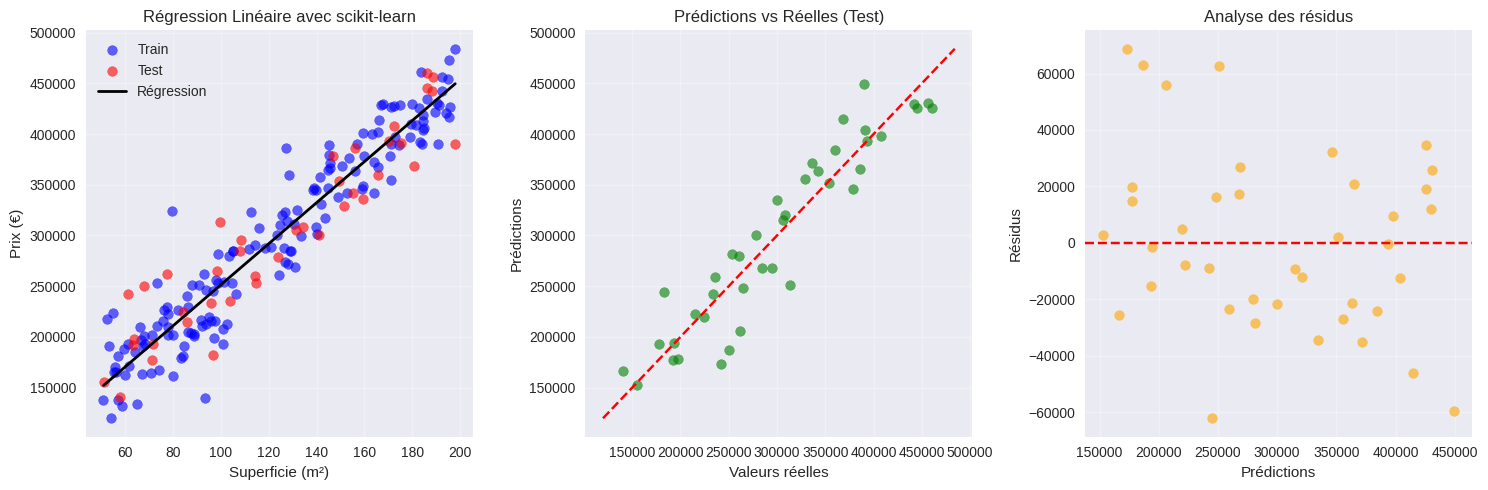

In [ ]:
plt.figure(figsize=(15, 5))

# Graphique 1: Données et droite de régression
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Train')
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test')

# Création de points pour la droite de régression
X_range = np.linspace(X['superficie'].min(), X['superficie'].max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
y_range_pred = model.predict(X_range_scaled)

plt.plot(X_range, y_range_pred, color='black', linewidth=2, label='Régression')
plt.title('Régression Linéaire avec scikit-learn')
plt.xlabel('Superficie (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 2: Prédictions vs Réelles
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', linestyle='--')
plt.title('Prédictions vs Réelles (Test)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.grid(True, alpha=0.3)

# Graphique 3: Résidus
plt.subplot(1, 3, 3)
residus = y_test - y_pred_test
plt.scatter(y_pred_test, residus, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Analyse des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analyse visuelle des performances
- **Droite de régression** : Ajustement sur les données train (bleu) et test (rouge)
- **Prédictions vs Réelles** : Points proches de la diagonale = bonnes prédictions
- **Résidus** : Distribution centrée autour de 0 indique un modèle non biaisé

# Patie c: TensorFlow (la régression linéaire à partir de TensorFlow)
----------------------------------------------------------------------


#data generation


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Génération des mêmes données
np.random.seed(42)
n_samples = 200
superficie = np.random.uniform(50, 200, n_samples)
prix = 2000 * superficie + 50000 + np.random.normal(0, 30000, n_samples)

X = superficie.reshape(-1, 1)
y = prix

print("Shape des données:", X.shape, y.shape)

Shape des données: (200, 1) (200,)


### Préparation des données pour TensorFlow
TensorFlow nécessite des arrays NumPy avec des dimensions spécifiques. On génère à nouveau les mêmes données pour cette partie.

### Préparation des données avec TensorFlow

In [ ]:
# Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Normalisation et split
Même processus que pour Scikit-Learn : normalisation puis séparation train/test pour une comparaison équitable des approches.

### Construction du modèle avec Keras

In [ ]:
# Création du modèle séquentiel
model = keras.Sequential([
    layers.Dense(1, input_shape=(1,), name='couche_lineaire')
])

# Compilation du modèle
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

print("Architecture du modèle:")
model.summary()

Architecture du modèle:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ couche_lineaire (Dense)         │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Architecture du réseau de neurones
Modèle séquentiel ultra-simple avec une seule couche Dense (1 neurone) = régression linéaire. On utilise SGD (Stochastic Gradient Descent) comme optimiseur avec MSE comme fonction de perte.

#Entraînement du modèle

In [ ]:
# Callback pour visualisation
class PrintMetrics(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: loss = {logs['loss']:.2f}, mae = {logs['mae']:.2f}")

# Entraînement
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[PrintMetrics()]
)

Epoch 0: loss = 89473007616.00, mae = 285142.00
Epoch 100: loss = 810550720.00, mae = 22517.76
Epoch 200: loss = 810094528.00, mae = 22505.72
Epoch 300: loss = 810324608.00, mae = 22519.94
Epoch 400: loss = 809980288.00, mae = 22503.07
Epoch 500: loss = 810146048.00, mae = 22502.15
Epoch 600: loss = 810647040.00, mae = 22500.69
Epoch 700: loss = 811063936.00, mae = 22507.73
Epoch 800: loss = 811091072.00, mae = 22543.12
Epoch 900: loss = 810595712.00, mae = 22529.51


### Entraînement avec callback
Le modèle s'entraîne sur 1000 epochs avec validation continue. Le callback permet d'afficher les métriques tous les 100 epochs pour suivre la progression.

### Évaluation et visualisation de l'entraînement


Performance finale:
Train - MSE: 809772224.00, MAE: 22496.62
Test  - MSE: 975727104.00, MAE: 25159.54


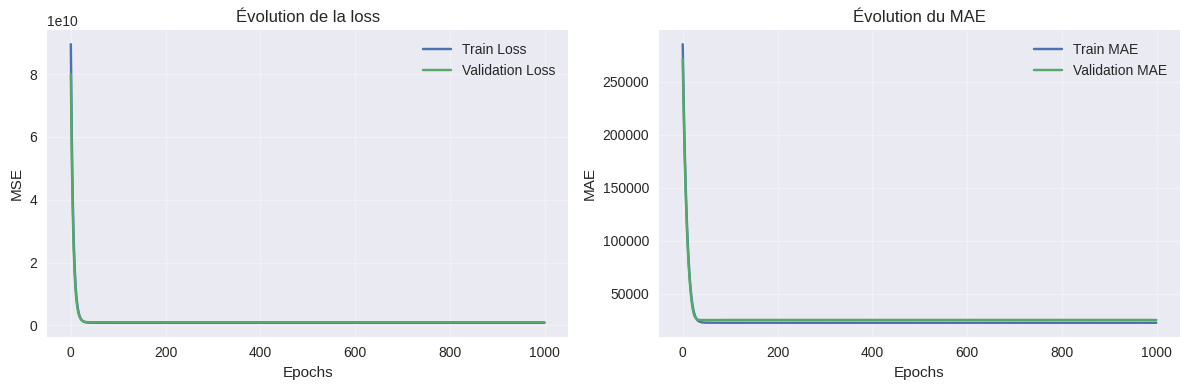

In [ ]:
# Performance finale
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"\nPerformance finale:")
print(f"Train - MSE: {train_loss:.2f}, MAE: {train_mae:.2f}")
print(f"Test  - MSE: {test_loss:.2f}, MAE: {test_mae:.2f}")

# Courbes d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Évolution du MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Monitoring de l'entraînement
Les courbes de loss et MAE permettent de vérifier la convergence et détecter un éventuel surapprentissage (gap important entre train et validation).

### Prédictions et visualisation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
R² score: 0.8700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


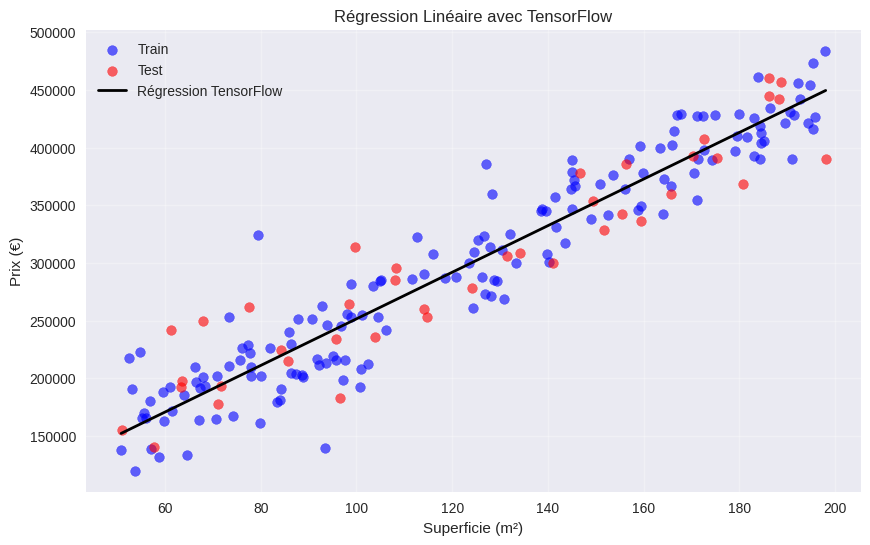

In [ ]:
# Prédictions
y_pred = model.predict(X_test)

# R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

# Visualisation
plt.figure(figsize=(10, 6))

# Données originales et prédictions
X_original = scaler.inverse_transform(X_train)
plt.scatter(X_original, y_train, alpha=0.6, color='blue', label='Train')
plt.scatter(scaler.inverse_transform(X_test), y_test, alpha=0.6, color='red', label='Test')

# Droite de régression
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
y_range_pred = model.predict(X_range_scaled)

plt.plot(X_range, y_range_pred, color='black', linewidth=2, label='Régression TensorFlow')
plt.title('Régression Linéaire avec TensorFlow')
plt.xlabel('Superficie (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Évaluation finale avec R²
Le R² score mesure la qualité de l'ajustement : proche de 1 = excellent modèle. La visualisation montre que TensorFlow obtient des résultats équivalents aux autres approches.

### Récupération des paramètres du modèle

In [ ]:
# Extraction des poids
poids, biais = model.layers[0].get_weights()
print(f"\nParamètres du modèle:")
print(f"Pente (poids): {poids[0][0]:.2f}")
print(f"Biais: {biais[0]:.2f}")

# Équation équivalente sans normalisation
pente_originale = poids[0][0] / scaler.scale_[0]
biais_original = biais[0] - (poids[0][0] * scaler.mean_[0] / scaler.scale_[0])

print(f"\nÉquation sur données originales:")
print(f"Prix = {pente_originale:.2f} × Superficie + {biais_original:.2f}")


Paramètres du modèle:
Pente (poids): 89143.22
Biais: 297164.31

Équation sur données originales:
Prix = 2020.33 × Superficie + 49469.37


### Extraction des paramètres appris
Les poids du réseau correspondent aux paramètres de la régression linéaire. On recalcule l'équation sur les données originales (avant normalisation) pour l'interpréter.

### Fonction de prédiction

In [ ]:
def predire_prix_tensorflow(superficie, model, scaler):
    """Prédit le prix avec le modèle TensorFlow"""
    superficie_array = np.array([[superficie]])
    superficie_scaled = scaler.transform(superficie_array)
    prix_pred = model.predict(superficie_scaled, verbose=0)
    return prix_pred[0][0]

# Test
superficies_test = [80, 120, 150, 180]
print("\nPrédictions TensorFlow:")
for superficie in superficies_test:
    prix_pred = predire_prix_tensorflow(superficie, model, scaler)
    print(f"Superficie {superficie} m² → Prix: {prix_pred:,.0f} €")


Prédictions TensorFlow:
Superficie 80 m² → Prix: 211,096 €
Superficie 120 m² → Prix: 291,910 €
Superficie 150 m² → Prix: 352,520 €
Superficie 180 m² → Prix: 413,130 €


### Fonction de prédiction TensorFlow
Wrapper pratique pour faire des prédictions avec gestion automatique de la normalisation et du format des données.

#Sauvegarde du modèle

In [ ]:
# Sauvegarde du modèle
model.save('modele_regression_tensorflow.h5')
print("Modèle TensorFlow sauvegardé!")

# Pour charger: model = keras.models.load_model('modele_regression_tensorflow.h5')

Modèle TensorFlow sauvegardé!


### Persistance du modèle
Sauvegarde du modèle au format H5 pour réutilisation future sans ré-entraînement. Permet de déployer le modèle en production facilement.

## Conclusion

### Comparaison des trois approches :

| Approche | Avantages | Inconvénients |
|----------|-----------|---------------|
| **From Scratch** | Compréhension profonde de l'algorithme | Code long, optimisations manuelles |
| **Scikit-Learn** | Simple, rapide, robuste | Moins flexible pour architectures complexes |
| **TensorFlow** | Extensible aux réseaux profonds, GPU | Overhead pour tâches simples |

**Résultats** : Les trois méthodes convergent vers des paramètres similaires, confirmant leur équivalence mathématique pour la régression linéaire simple.

**Application pratique** : Pour ce problème simple, Scikit-Learn est le choix optimal. TensorFlow devient pertinent pour des architectures plus complexes (deep learning).